Installation of tensorflow object detection api

# 0. Download TF Models Pretrained Models from Tensorflow Model Zoo in the main directory

In [ ]:
# !cd Tensorflow && git clone https://github.com/tensorflow/models

Cloning into 'models'...


In [ ]:
# !wget.download('http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz')
# !mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {PRETRAINED_MODEL_PATH}
# !cd {PRETRAINED_MODEL_PATH} && tar -zxvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

/bin/bash: -c: line 0: syntax error near unexpected token `'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz''
/bin/bash: -c: line 0: `wget.download('http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz')'
mv: cannot stat 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz': No such file or directory
tar (child): ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


In [ ]:
%%bash
pip install -U --pre tensorflow=="2.5"
pip install tf_slim
pip install pycocotools

Requirement already up-to-date: tensorflow==2.5 in /usr/local/lib/python3.7/dist-packages (2.5.0)


In [ ]:
%%bash
cd /content/drive/MyDrive/Detection/models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .

In [ ]:
%%bash
cd /content/drive/MyDrive/Detection/models/research/
pip install .

Processing /content/drive/MyDrive/Detection/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1658497 sha256=8a6b2b53a671966de20613b1d4f5041c2323900d4fafde9c7a4755023c9c5b4a
  Stored in directory: /tmp/pip-ephem-wheel-cache-6sakzbzy/wheels/f8/74/aa/451deaef3c49915f1c67ad8a5a8f7eec35ac379d41e148bffa
  Created wheel for avro-python3: filename=avro_python3-1.10.2-cp37-none-any.whl size=44011 sha256=e405229e2cdb8f7512c03f5a4520954aa7433e57b4d8006a3e3ab717070b2f44
  Stored in directory: /root/.cache/pip/wheels/ee/ee/18/c466221ca6900e3efce2f4ea9c329288808679aecdcb2838d3
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78545 sha256=d72ea80c388f4a7d3726ac8c4b4edf6abd1384800929948cf931813ba9a854c5
  Stored in directory: /root/.cache/pip/wheels/59/b1/91/f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=46a0e36cd26a9cec3d9b53113723

ERROR: multiprocess 0.70.12.2 has requirement dill>=0.3.4, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.26.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.31.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1, but you'll have avro-python3 1.10.2 which is incompatible.


In [ ]:
%%bash
cd /content/drive/MyDrive/Detection/models/research/
python object_detection/builders/model_builder_tf2_test.py

9412608/9406464 [==============================] - 0s 0us/step


2021-07-17 04:59:57.168637: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.11: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-17 05:00:00.480401: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-17 05:00:00.587589: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-17 05:00:00.587661: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a1df26c0a4ce): /proc/driver/nvidia/version does not exist
W0717 05:00:00.878224 140676519151488 model_builder.py:1088] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.75s
I0717 05:00

# 1. Setup Paths

In [ ]:
%ls

drive/  sample_data/


In [18]:
WORKSPACE_PATH = '/content/drive/MyDrive/Detection/hat_detection/workspace'
APIMODEL_PATH = '/content/drive/MyDrive/Detection/models'
ANNOTATION_PATH = WORKSPACE_PATH+'/annotations'
IMAGE_PATH = WORKSPACE_PATH+'/images'
MODEL_PATH = WORKSPACE_PATH+'/models'
PRETRAINED_MODEL_PATH = WORKSPACE_PATH+'/pre-trained-models'
CONFIG_PATH = MODEL_PATH+'/my_ssd_mobnet/pipeline.config'
CHECKPOINT_PATH = MODEL_PATH+'/my_ssd_mobnet/'

# 2. Create Label Map

In [ ]:
labels = [{'name':'Helmet', 'id':1}, 
            {'name':'Jacket', 'id':2},
            {'name':'Mask', 'id':3}, 
            {'name':'No-helmet', 'id':4},
            {'name':'No-jacket', 'id':5}, 
            {'name':'No-mask', 'id':6}]

with open(ANNOTATION_PATH + '/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
%ls

drive/  sample_data/


In [ ]:
!python /content/drive/MyDrive/Detection/hat_detection/workspace/generate_tfrecord.py --csv_input=/content/drive/MyDrive/Detection/hat_detection/workspace/images/train_labels.csv --image_dir=/content/drive/MyDrive/Detection/hat_detection/workspace/images/train/ --output_path=/content/drive/MyDrive/Detection/hat_detection/workspace/annotations/train.record
!python /content/drive/MyDrive/Detection/hat_detection/workspace/generate_tfrecord.py --csv_input=/content/drive/MyDrive/Detection/hat_detection/workspace/images/test_labels.csv --image_dir=/content/drive/MyDrive/Detection/hat_detection/workspace/images/test/ --output_path=/content/drive/MyDrive/Detection/hat_detection/workspace/annotations/test.record


2021-07-16 16:13:25.008694: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/drive/MyDrive/Detection/hat_detection/workspace/annotations/train.record
2021-07-16 16:13:28.130623: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/drive/MyDrive/Detection/hat_detection/workspace/annotations/test.record


# =====4. Copy Model Config to Training Folder

In [19]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 

In [ ]:
# !mkdir {'/content/drive/MyDrive/Detection/hat_detection/workspace/models/'+CUSTOM_MODEL_NAME}
# !cp /content/drive/MyDrive/Detection/hat_detection/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config /content/drive/MyDrive/Detection/hat_detection/workspace/models/my_ssd_mobnet

mkdir: cannot create directory ‘/content/drive/MyDrive/Detection/hat_detection/workspace/models/my_ssd_mobnet’: File exists


# 5. Update Config For Transfer Learning

In [20]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [21]:
CONFIG_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME+'/pipeline.config'

In [22]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

In [ ]:
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = 6
pipeline_config.train_config.batch_size = 8
pipeline_config.train_config.fine_tune_checkpoint = PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/train.record']
pipeline_config.eval_input_reader[0].label_map_path = ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/test.record']

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [ ]:
!python /content/drive/MyDrive/Detection/hat_detection/workspace/model_main_tf2.py --model_dir=/content/drive/MyDrive/Detection/hat_detection/workspace/models/my_ssd_mobnet --pipeline_config_path=/content/drive/MyDrive/Detection/hat_detection/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000

2021-07-16 16:44:31.505374: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-16 16:44:34.076231: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-16 16:44:34.088015: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-16 16:44:34.088064: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (73b58b26582c): /proc/driver/nvidia/version does not exist
W0716 16:44:34.089128 140326559336320 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
W0716 16:44:34.089403 140326559336320 mirrored_strategy.py:379] Collective ops is not configured at program startup. Some performance features may not be enabled.
INFO:tensorflow:Using MirroredStrategy w

Eval

In [ ]:
!python /content/drive/MyDrive/Detection/models/research/object_detection/model_main_tf2.py  --model_dir=/content/drive/MyDrive/Detection/mask_detection/workspace/models/my_ssd_mobnet --pipeline_config_path=/content/drive/MyDrive/Detection/mask_detection/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=/content/drive/MyDrive/Detection/mask_detection/workspace/models/my_ssd_mobnet

2021-07-17 07:42:21.457169: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
W0717 07:42:24.587173 139696717866880 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0717 07:42:24.587531 139696717866880 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0717 07:42:24.587652 139696717866880 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0717 07:42:24.587758 139696717866880 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0717 07:42:24.587949 139696717866880 model_lib_v2.py:1103] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-07-17 07:42:24.598885: I tensorflow/stream_executor/

tensorboard

In [ ]:
!tensorboard --logdir=/content/drive/MyDrive/Detection/mask_detection/workspace/models/my_ssd_mobnet --bind_all

2021-07-17 07:39:33.828946: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.5.0 at http://a1df26c0a4ce:6006/ (Press CTRL+C to quit)
^C


Export

In [ ]:
# !python /content/drive/MyDrive/Detection/mask_detection/workspace/exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/Detection/mask_detection/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir /content/mask_detection/Tensorflow/workspace/models/my_ssd_mobnet --output_directory /content/drive/MyDrive/Detection/mask_detection/workspace/exported-models/model



# 7. Load Train Model From Checkpoint

In [23]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

In [27]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(CONFIG_PATH)
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 8. Detect in Real-Time

In [ ]:
import cv2 
import numpy as np

In [30]:
category_index = label_map_util.create_category_index_from_labelmap(ANNOTATION_PATH+'/label_map.pbtxt')

In [ ]:
# Setup capture
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

Running inference for /... 

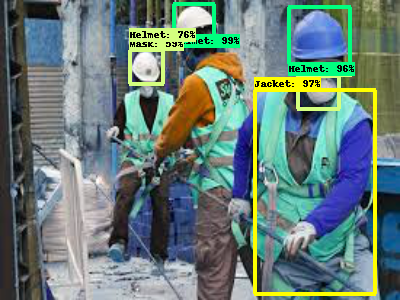

Done


In [49]:
import numpy as np
import cv2 
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow   # Suppress Matplotlib warnings

IMAGE_PATHS = '/'

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')
    image_path = '/content/drive/MyDrive/Detection/hat_detection/workspace/images/test/images.jpeg'
    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    image_np_with_detections = cv2.resize(image_np_with_detections, (400,300))

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=0.4,
            agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    # image_np_with_detections = cv2.resize(image_np_with_detections, (400,300))
    cv2_imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2